In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results.csv')

In [4]:
# remove rows with empty values in the Actions column
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
# convert all values to float wherever possible
df = df.applymap(lambda x: pd.to_numeric(x, errors='ignore'))




print(df[df['Problem'] == 'p1'].to_string())
print(df[df['Problem'] == 'p2'].to_string())
print(df[df['Problem'] == 'p3'].to_string())
print(df[df['Problem'] == 'p4'].to_string())

   Problem     Label  Actions  Expansions  Goal Tests  New Nodes  Plan Length     Time
0       p1       bfs     20.0        43.0        56.0      178.0          6.0  0.03830
1       p1       dfs     20.0        21.0        22.0       84.0         20.0  0.00890
2       p1       ucs     20.0        60.0        62.0      240.0          6.0  0.02620
3       p1  gb-unmet     20.0         7.0         9.0       29.0          6.0  0.00365
4       p1  gb-level     20.0         6.0         8.0       28.0          6.0  1.17000
5       p1    gb-max     20.0         6.0         8.0       24.0          6.0  0.34000
6       p1    gb-set     20.0         7.0         9.0       31.0          7.0  1.84000
7       p1  as-unmet     20.0        50.0        52.0      206.0          6.0  0.04050
8       p1  as-level     20.0        28.0        30.0      122.0          6.0  0.63600
9       p1    as-max     20.0        43.0        45.0      180.0          6.0  0.35100
10      p1    as-set     20.0        51.0  

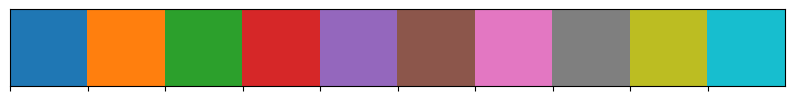

In [5]:
# Set sns palette
sns.set_palette("tab10")
# Show palette
sns.palplot(sns.color_palette())

<Figure size 1200x800 with 0 Axes>

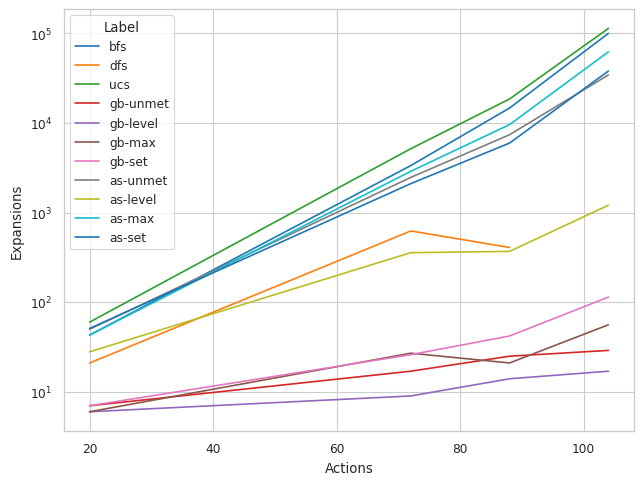

In [6]:
darkmode = False
if darkmode:
    sns.set_theme(style="darkgrid")
else:
    sns.set_theme(style="whitegrid")

# Set fig size and context
plt.figure(figsize=(12, 8))
sns.set_context("paper")
# Set palette
sns.set_palette("tab10")

# Expansions plot
fig, ax = plt.subplots()
fig.tight_layout()
#ax.set_title('Expansions vs Actions')
ax.set_xlabel('Actions')
ax.set_ylabel('Expansions')
ax.set_yscale('log')
g = sns.lineplot(
    data = df,
    x='Actions',
    y='Expansions',
    hue='Label',
    palette="tab10",
)
fig.savefig('expansions_vs_actions.png', dpi=600)
plt.show()



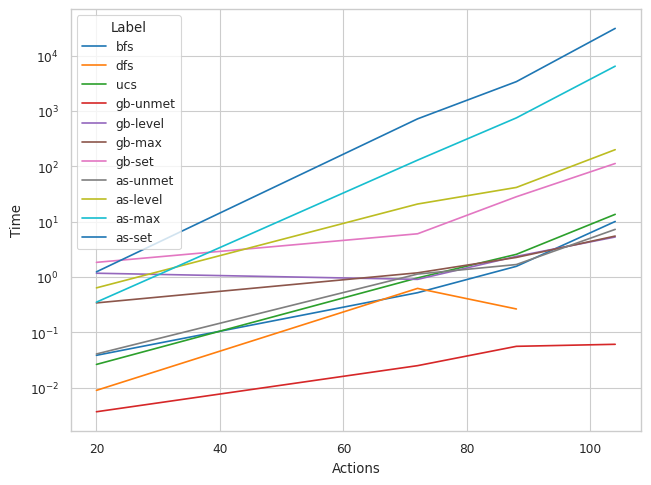

In [7]:
# Time Plot
fig, ax = plt.subplots()
fig.tight_layout()
#ax.set_title('Expansions vs Actions')
ax.set_xlabel('Actions')
ax.set_ylabel('Time')
ax.set_yscale('log')
g = sns.lineplot(
    data = df,
    x='Actions',
    y='Time',
    hue='Label',
    palette="tab10",
)
fig.savefig('time_vs_actions.png', dpi=600)
plt.show()

In [8]:
# Create a new df based on df that has the label as the index and the columns as the time for each problem
df2 = df.pivot(index='Label', columns='Problem', values='Plan Length')

In [9]:
df2


Problem,p1,p2,p3,p4
Label,,,,
as-level,0.63600,20.9000,41.7000,201.0000
as-max,0.35100,130.0000,756.0000,6510.0000
as-set,1.24000,726.0000,3420.0000,31400.0000
as-unmet,0.04050,1.1300,1.6800,7.2700
bfs,0.03830,0.5200,1.5600,10.1000
dfs,0.00890,0.6220,0.2640,NaN
gb-level,1.17000,0.9060,2.3600,5.2900
gb-max,0.34000,1.1900,2.2600,5.5000
gb-set,1.84000,6.0500,28.3000,113.0000
